In [1]:
# 1. Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from functions import *

In [3]:
# 2. Load the customer_value_analysis.csv into the variable customer_df.

# 3.First look at its main features (head, shape, info).

data = pd.read_csv('C:/Users/e.sansebastian/OneDrive - EXPONDO/Ironhack/Weeks/Week_4/Day_1/Morning/lab-cleaning-numerical-data/files_for_lab/customer_value_analysis.csv')
display(data.head())
print("df contains rows and columns: ",data.shape)
print("\n""\n")
display(data.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


df contains rows and columns:  (9134, 24)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Mon

None

In [4]:
# 4.Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

# I apply the function I have created whilst preparing my data cleaning / transformation labs, importing it from the .py file.
data=lowercase_headers_and_replace_spaces(data)

In [5]:
data.head(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
# 5. Change the type of effective_to_date column to DateTime format.

data["effective_to_date"]= pd.to_datetime(data['effective_to_date'], errors='coerce')
display(data.dtypes["effective_to_date"])

C:\Users\e.sansebastian\AppData\Local\Temp\ipykernel_10320\3428535794.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["effective_to_date"]= pd.to_datetime(data['effective_to_date'], errors='coerce')


dtype('<M8[ns]')

In [7]:
# 6. Check NaN values per column.
data.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [8]:
# 7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

def numerical_categorical(df: pd.DataFrame) -> pd.DataFrame:

    '''
This function takes a DataFrame as input and returns 2 dataframes:

1. DataFrame with numerical values/columns.
2. DataFrame with categorical/columns.

Input:

1 DataFrame

Output:

2 Individual dataFrames for numerical and categorical

    '''

    df2 = df.copy()  

    numericals = pd.DataFrame(df2.select_dtypes(np.number))
    categoricals = pd.DataFrame(df2.select_dtypes(include=[object]))

    return numericals, categoricals

In [9]:
numericals,categoricals=numerical_categorical(data)

In [10]:
display(numericals.head())
display(categoricals.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [11]:
# 8. Drop any ID column.

# customer seems to be the only ID like column

categoricals.drop(columns="customer",inplace=True)

In [12]:
categoricals.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


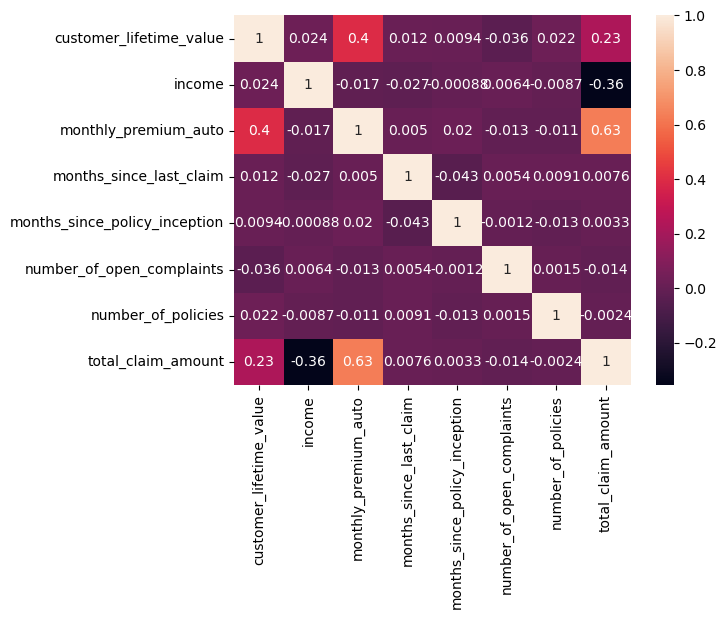

In [13]:
# 9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

# As we have seen in previous labs monthly_premium_auto and total claim amount seem to be the 2 highest correlated values. 
# IMO this is because the higher the customers pay for this service the more often they report damages on their vehicles.

correlations_matrix = numericals.corr()
display(correlations_matrix)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [14]:
# 10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: 
#the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. 
#To this end, it might be helpful to count the number of unique values. 
# The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. 
# Then, use it to create two new dataframes: continuous_df and discrete_df.

#Continuous (can take any real value)
#Discrete (can only take integer values: ie grade)

def continous_discrete(df:pd.DataFrame) -> pd.DataFrame:
    '''
    This function takes a numerical dataframe and returns 2 DataFrames:
    1. continous
    2. discrete
    
    Input:
    
    numerical Dataframe
    
    Output:
    
    1 continous and 1 discrete dataframes
    
    '''
    df2 = df.copy()
    # we create a dataframe to store the unique values of each column
    unique_df =pd.DataFrame(df.nunique())
    unique_df.rename(columns={0:"uniques"},inplace=True)
    # We filter by index those columns with >36 or <= 36
    continous_cols = list(unique_df[unique_df["uniques"]>36].index)
    discrete_cols = list(unique_df[unique_df["uniques"]<=36].index)
    continous = numericals[continous_cols]
    discrete = numericals[discrete_cols]
    return continous,discrete


In [15]:
continous,discrete = continous_discrete(numericals)

In [16]:
display(continous.head())
display(discrete.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [17]:
# 11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

def plot_discrete(df:pd.DataFrame)->None:


    '''
    This function takes a dataframe and creates as many bar/histoplots as columns.
    
    Parameters:
    - df: The input DataFrame.

    Returns:
    None

    '''
    # I create a duplicate of the dataframe
    df2 = df.copy()
    # I create a counter to be able to increment the index by 1 after each loop
    counter = 0
    fig, ax = plt.subplots(len(df2.columns), figsize=(16,16))
    
    # I create a loop for each col in the dataframe:
    for col in df2:
        sns.histplot(x=col, data = df2, ax = ax [counter]);
        ax[counter].set_title(col)
        counter +=1

plt.show()


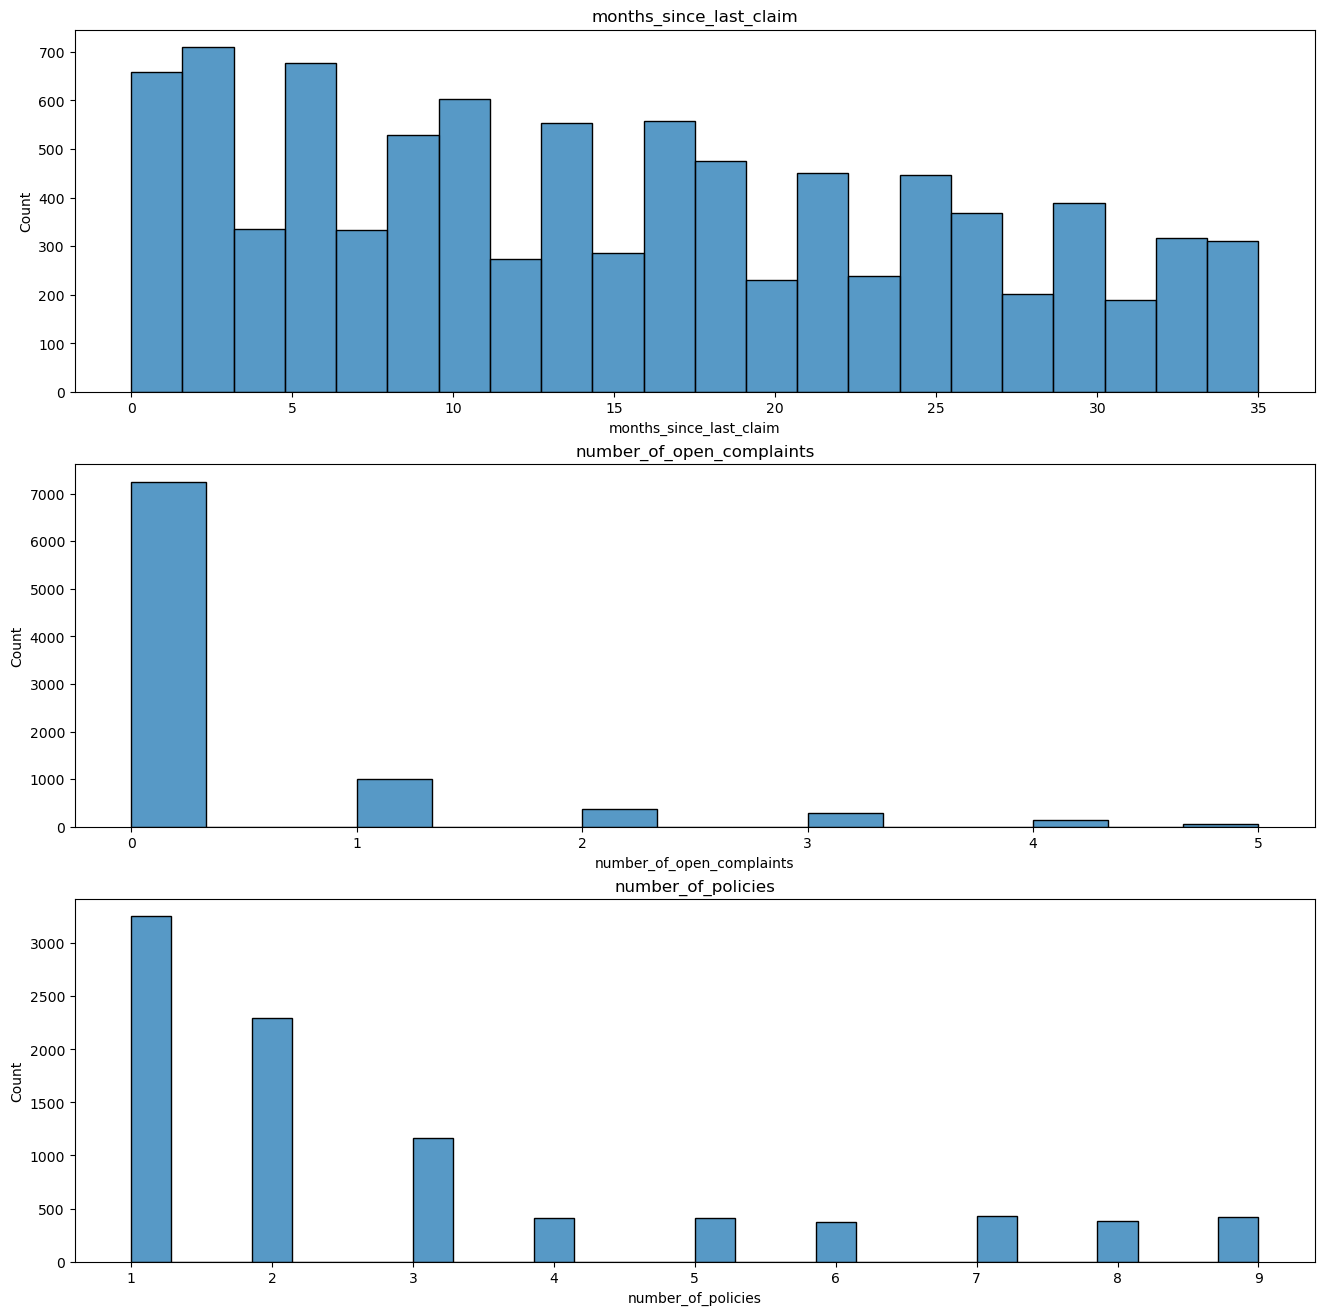

In [18]:
plot_discrete(discrete)

In [19]:
# 13. According to the previous histogram plots, do you think that you will have to apply any transformation?

print("skewness of number_of_open_complaints is", discrete["number_of_open_complaints"].skew().round(2))
print("skewness of number_of_policies is", discrete["number_of_policies"].skew().round(2))

# Hard to say if we are to apply any transformation. The 2 columns above have a positive skewness, showing a tail to the right,
# which shows a smaller amount of values for higher numbers, which could lead to a more difficult predeactability of y.
# Probably a PowerScaler can be applied i.e. on the last 2 columns, as it only contains a spike.



skewness of number_of_open_complaints is 2.78
skewness of number_of_policies is 1.25


C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


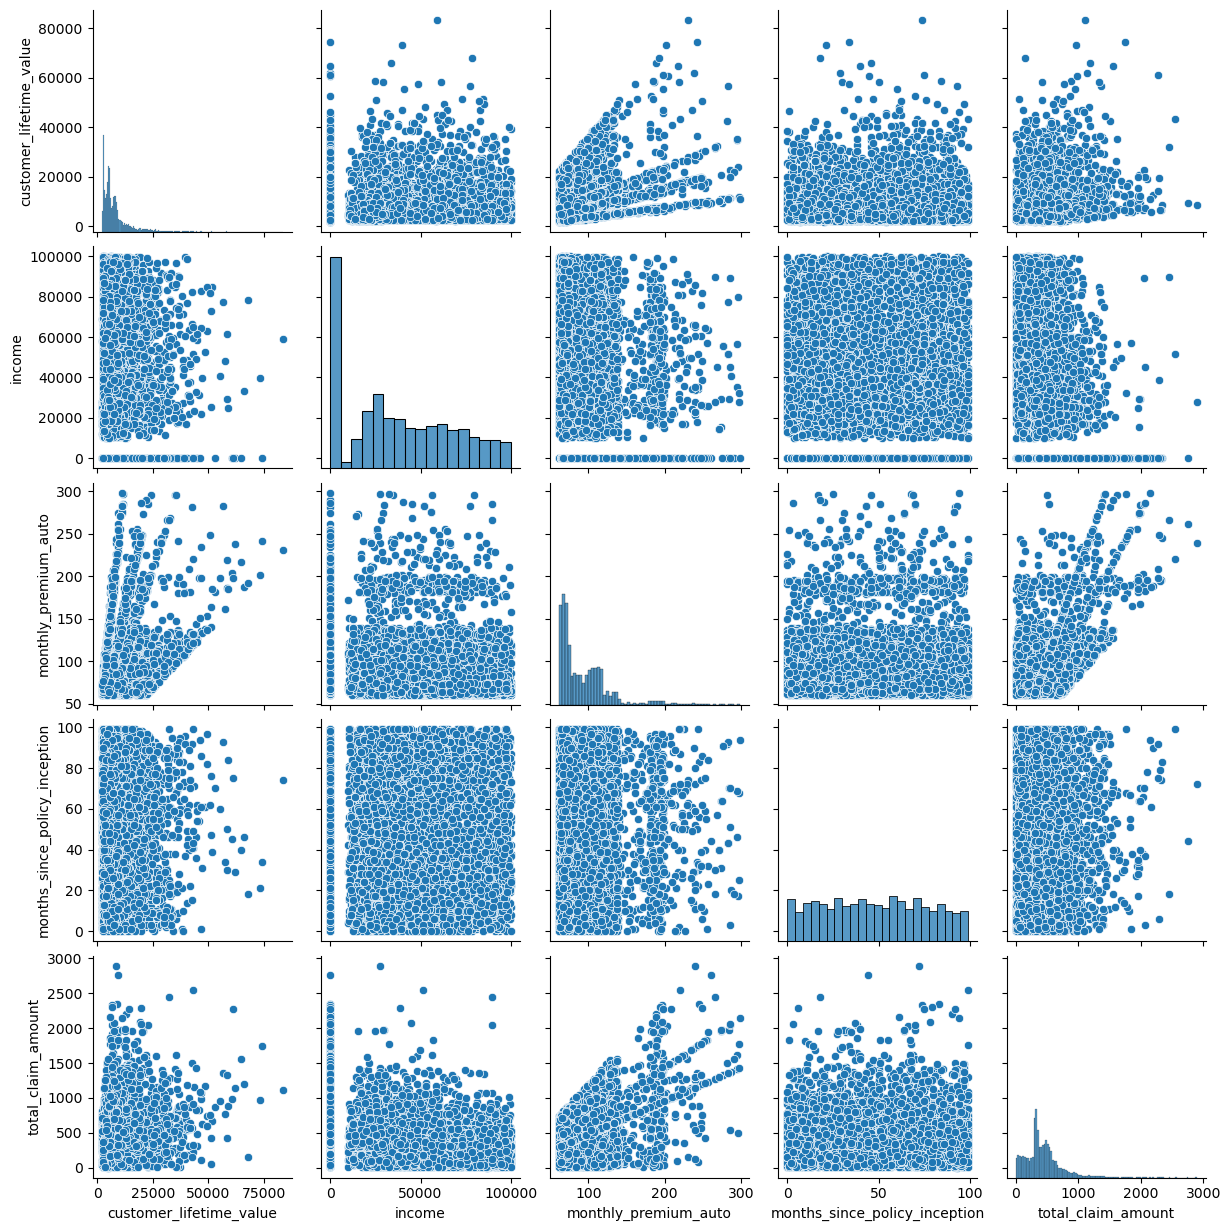

In [20]:
# 14. Look for outliers in the continuous variables that you have found. 
#Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

# Since I am still a bit confused about outliers I have decided to show a pairplot and box and histoplots for each X value.

# I see that colums such as customer_lifetime_value, monthly_premium_auto and total_claim_amount seem to have some outliers.

sns.pairplot(data=continous)

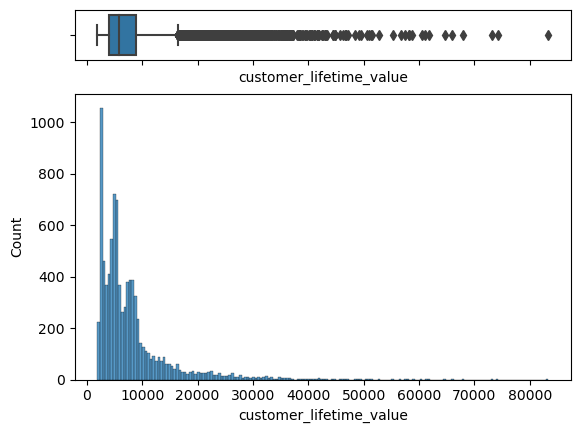

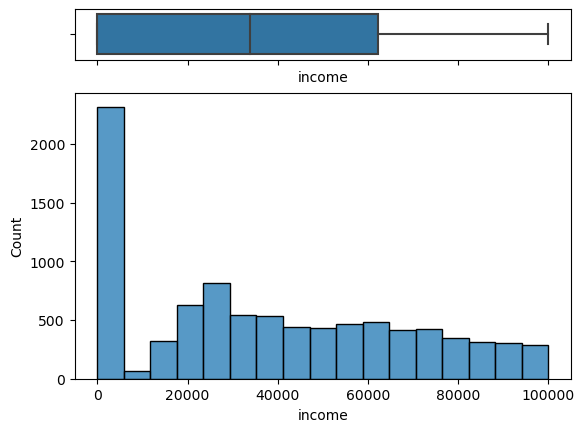

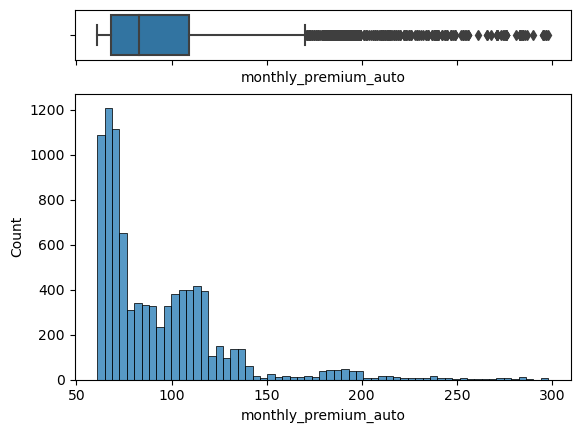

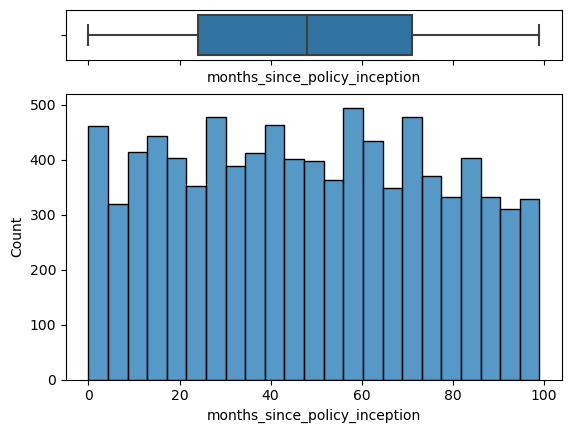

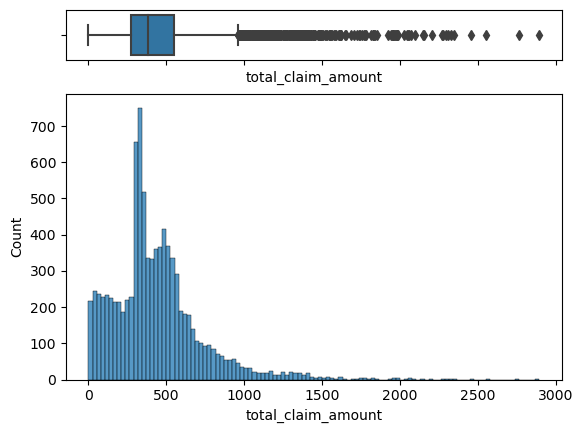

In [21]:
for column in continous:
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=continous, x=column, ax=ax_box)
    sns.histplot(data=continous, x=column, ax=ax_hist)
    plt.show()

# Lab Cleaning Categorical Data.

1. Define a function that given a pandas DataFrame as input creates a **seaborn countplot** of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [22]:
def plot_categoricals(df:pd.DataFrame)->None:

    '''
    This function takes a the categorical columns from a DataFrame
    and creates as many bar/histoplots as columns.
    
    Parameters:
    - df: The input DataFrame.

    Returns:
    None

    '''
    # I create a duplicate of the dataframe
    df2 = df.copy()
    # I create a counter to be able to increment the index by 1 after each loop
    counter = 0
    fig, ax = plt.subplots(len(df2.columns), figsize=(10, 5 * len(df2.columns)))
    
    # I create a loop for each col in the dataframe:
    for col in df2:
        if df2[col].nunique()>=6:
            sns.countplot(data=df2, y=col, order= df2[col].value_counts(dropna=False).index, ax = ax [counter])
            ax[counter].set_title(col)
            counter +=1
        else:
            sns.countplot(data=df2, x=col, order= df2[col].value_counts(dropna=False).index, ax = ax [counter])
            ax[counter].set_title(col)
            counter +=1 
    plt.tight_layout()
    plt.show()

    return None

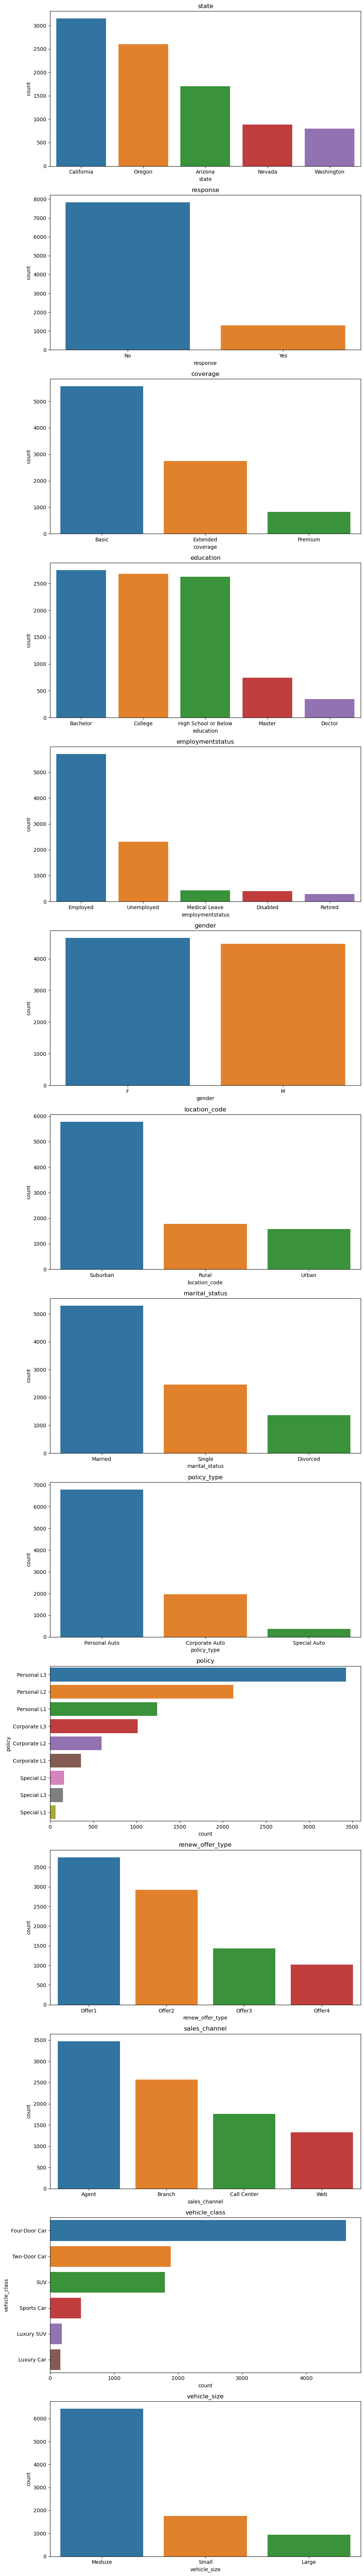

In [23]:
plot_categoricals(categoricals)

2. `policy_type` and `policy` columns are redundant, and what's worse `policy` column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column `policy_type` and transform the column `policy` to three possible values: L1, L2, and L3 using a function.

In [24]:
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [25]:
categoricals = categoricals.drop(columns="policy_type",axis=1)

In [26]:
categoricals.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [27]:
categoricals["policy"].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [28]:
def clean_policy(df:pd.DataFrame,col:"string"="policy")-> pd.DataFrame:
    '''
    This function takes a colum of a dataframe and replaces the values:
        'Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], 
       
    with simply L3,L2 and L1
    
    Input:
    
    DataFrame
    Column, if not provided it takes the column "policy"
    
    Output:
    
    Simplified options:  L3,L2 and L1
    
    '''
    
    df2 = df.copy()
    
    policy_dict = {'Corporate L3':"L3", 'Personal L3':"L3", 'Corporate L2':"L2", 'Personal L1':"L1",
       'Special L2':"L2", 'Corporate L1':"L1", 'Personal L2':"L2", 'Special L1':"L1",
       'Special L3':"L3"}
    df2 = df2.replace({col: policy_dict})
    return df2
    
    

In [29]:
categoricals = clean_policy(categoricals)

In [30]:
categoricals["policy"].value_counts()

policy
L3    4588
L2    2881
L1    1665
Name: count, dtype: int64

3. Time dependency analysis. Use a seaborn line plot using the column `effective_to_date` to see if `total_claim_amount` is bigger at some specific dates. Use a figsize=(10,10)

In [31]:
sum_claims = data.groupby("effective_to_date").agg({"total_claim_amount": "sum"}).round().reset_index()
sum_claims.head()

,effective_to_date,total_claim_amount
0,2011-01-01,67481.0
1,2011-01-02,68212.0
2,2011-01-03,75794.0
3,2011-01-04,51824.0
4,2011-01-05,81574.0


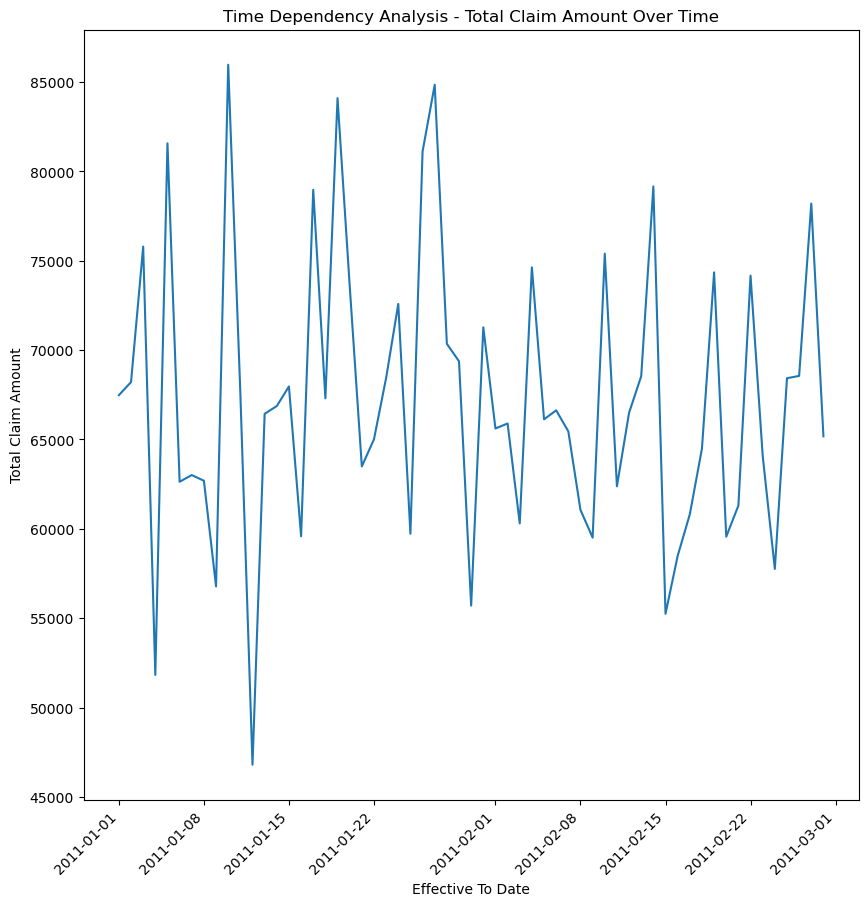

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# I decide to choose the lineplot to have a better visibility of the total 
sns.lineplot(x="effective_to_date", y="total_claim_amount", data=sum_claims)

# Rotate x-axis labels for better visibility (adjust the rotation angle as needed)
plt.xticks(rotation=45, ha="right")

# Set plot labels and title
plt.xlabel("Effective To Date")
plt.ylabel("Total Claim Amount")
plt.title("Time Dependency Analysis - Total Claim Amount Over Time")

# Display the plot
plt.show()

4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
* `day` with the day number of `effective_to_date`
* `day_name` with the day NAME of `effective_to_date`
* `week` with the week of `effective_to_date`
* `month` with the month NAME of `effective_to_date`
* `total_claim_amount` with `total_claim_amount`

In [33]:
# We create an empty DataFrame, which we will populate with the 
time_df= pd.DataFrame()

In [34]:
from datetime import datetime
time_df["day"]= data['effective_to_date'].dt.day
time_df["day_name"]= data['effective_to_date'].dt.day_name()
time_df["week"]= data['effective_to_date'].dt.isocalendar().week
time_df["month"]= data['effective_to_date'].dt.month_name()
time_df["total_claim_amount"]= data['total_claim_amount']
time_df.head()

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879


In [35]:
time_df["day_name"].unique()

array(['Thursday', 'Monday', 'Saturday', 'Tuesday', 'Wednesday', 'Sunday',
       'Friday'], dtype=object)

5. Compute the total `target` column aggregated `day_name` rounded to two decimals and then reorder the index of the resulting pandas series using `.reindex(index=list_of_correct_days)`

In [36]:
# I understand with this activity that we have to display the SUM of the total claim amount per day of the week and reorder the names

list_of_correct_values=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
day_name_sum = time_df.groupby("day_name").agg({"total_claim_amount":"sum"}).reindex(index=list_of_correct_values).round(2).reset_index()
day_name_sum

,day_name,total_claim_amount
0,Monday,655689.71
1,Tuesday,502518.93
2,Wednesday,541563.05
3,Thursday,541820.80
4,Friday,533658.79
5,Saturday,608060.10
6,Sunday,581655.66


6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

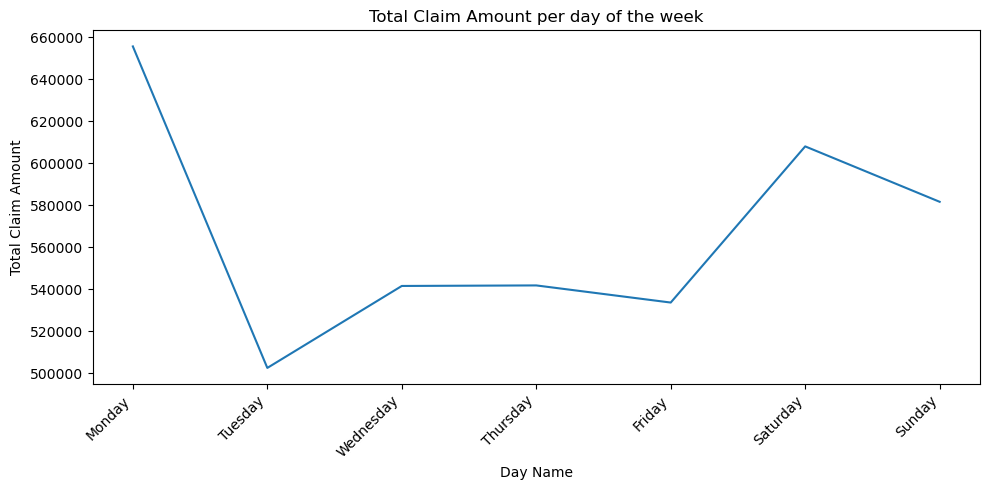

In [37]:
plt.figure(figsize=(10, 5))

# I decide to choose the lineplot to have a better visibility of the total 
sns.lineplot(x="day_name", y="total_claim_amount", data=day_name_sum)

# Rotate x-axis labels for better visibility (adjust the rotation angle as needed)
plt.xticks(rotation=45, ha="right")

# Set plot labels and title
plt.xlabel("Day Name")
plt.ylabel("Total Claim Amount")
plt.title("Total Claim Amount per day of the week")

# Display the plot
plt.tight_layout()
plt.show()

In [38]:
# We can see that Monday is the day of the week with the highest amount of claims, dropping by approx. 23% on Tuesday. The amount
# remains quiet stable through the week and reaches another pick over 600 K on Saturday.

7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using `.reindex(index=list_of_correct_values)`

In [39]:
list_of_correct_values=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
day_name_count = time_df.groupby("day_name").agg({"total_claim_amount":"count"}).reindex(index=list_of_correct_values).round(2).reset_index()
day_name_count

,day_name,total_claim_amount
0,Monday,1530
1,Tuesday,1162
2,Wednesday,1221
3,Thursday,1249
4,Friday,1245
5,Saturday,1397
6,Sunday,1330


8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [40]:
list_of_correct_values=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
day_name_med= time_df.groupby("day_name").agg({"total_claim_amount":"median"}).reindex(index=list_of_correct_values).round(2).reset_index().sort_values(by="total_claim_amount",ascending=False)
day_name_med

,day_name,total_claim_amount
3,Thursday,395.33
2,Wednesday,392.24
0,Monday,385.74
6,Sunday,383.72
5,Saturday,379.20
1,Tuesday,378.49
4,Friday,371.80


9. Plot the median "target" by day of the week name using a seaborn barplot

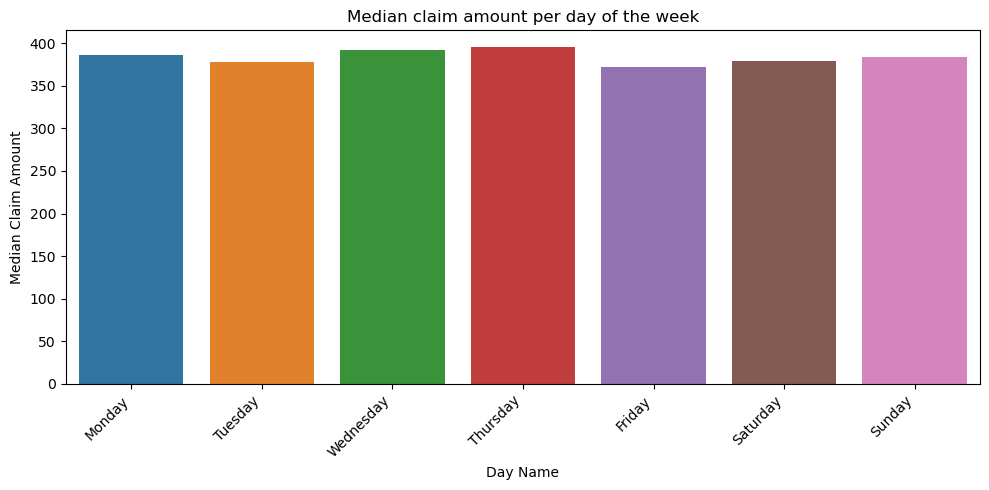

In [41]:
plt.figure(figsize=(10, 5))

# I decide to choose the lineplot to have a better visibility of the total 
sns.barplot(x="day_name", y="total_claim_amount", data=day_name_med,order =list_of_correct_values)

# Rotate x-axis labels for better visibility (adjust the rotation angle as needed)
plt.xticks(rotation=45, ha="right")

# Set plot labels and title
plt.xlabel("Day Name")
plt.ylabel("Median Claim Amount")
plt.title("Median claim amount per day of the week")

# Display the plot
plt.tight_layout()
plt.show()

11. What can you conclude from this analysis?

In [42]:
# Despite being the aggregated claim amount higher on Monday, Thursday has the highest median on number of claims per week.
# Could be because an isolated event on Monday...We can check later when dealing with outliers.

12. Compute the total `target` column aggregated `month` rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [43]:
list_of_correct_values_month=["January","February"]
month_sum = time_df.groupby("month").agg({"total_claim_amount":"sum"}).reindex(index=list_of_correct_values_month).round(2).reset_index()
month_sum.head()

,month,total_claim_amount
0,January,2117142.86
1,February,1847824.19


13. Can you do a monthly analysis given the output of the previous series? Why?

In [44]:
# Well not sure if it´s meant if I can plot it. If so, we see that January has +14% higher claim amount of February
# Not sure if the question is more related to being able to make an analysis from a series....

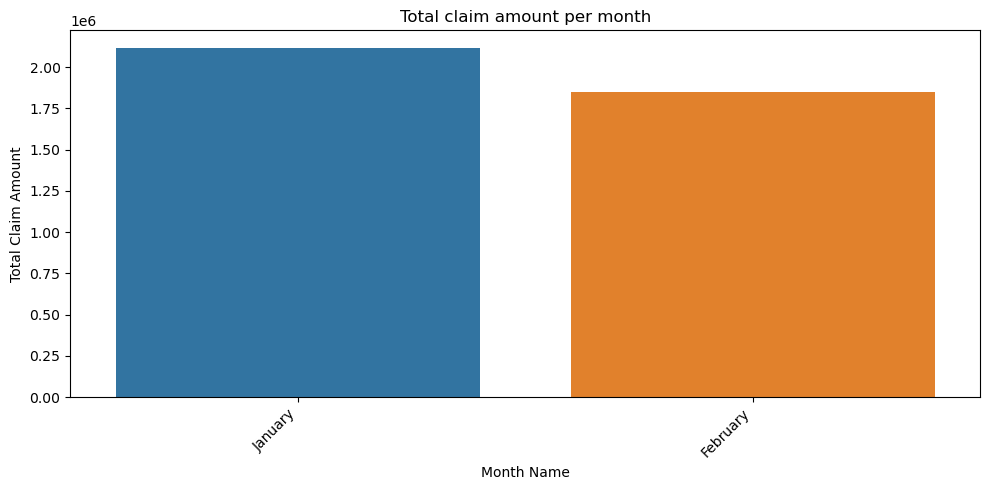

In [45]:
plt.figure(figsize=(10, 5))

# I decide to choose the lineplot to have a better visibility of the total 
sns.barplot(x="month", y="total_claim_amount", data=month_sum,order =list_of_correct_values_month)

# Rotate x-axis labels for better visibility (adjust the rotation angle as needed)
plt.xticks(rotation=45, ha="right")

# Set plot labels and title
plt.xlabel("Month Name")
plt.ylabel("Total Claim Amount")
plt.title("Total claim amount per month")

# Display the plot
plt.tight_layout()
plt.show()

14. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [46]:
# I first show the amount of rows before removing outliers

print(f"continous df contains {continous.shape[0]} rows before removing outliers")

continous df contains 9134 rows before removing outliers


In [47]:

def remove_outliers(df:pd.DataFrame, threshold=3)->pd.DataFrame:
    """
    Remove outliers from a numerical continuous column in a DataFrame.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - column_name (str): The name of the column containing numerical values.
    - threshold (float): The threshold for detecting outliers in terms of standard deviations from the mean.

    Returns:
    - DataFrame: The DataFrame with outliers removed.
    """
    df2 = df.copy()
    for col in df.columns:
        mean_value = df2[col].mean()
        std_value = df2[col].std()
        lower_lim = mean_value - threshold * std_value
        upper_lim = mean_value + threshold * std_value
        df2 = df2[(df2[col] >= lower_lim) & (df2[col] <= upper_lim)]

    return df2


15. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [48]:
continuous_clean_df = remove_outliers(continous)

In [49]:
print(f"continous df contains {continuous_clean_df.shape[0]} rows after removing outliers")

continous df contains 8575 rows after removing outliers



16. Concatenate the `continuous_cleaned_df`, `discrete_df`, `categorical_df`, and the relevant column of `time_df`. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using `pd.concat()`) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use `pd.dropna()` and `.reset_index()` to fix the final dataframe.

In [50]:
concat_data = pd.concat([continuous_clean_df, discrete, categoricals, time_df[["day", "week", "month"]]], axis=1).dropna().reset_index(drop=True)
display(concat_data.head())
concat_data.isnull().sum()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,week,month
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,8,February
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,5,January
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,7,February
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,20,3,January
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,5,February


customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_policy_inception    0
total_claim_amount               0
months_since_last_claim          0
number_of_open_complaints        0
number_of_policies               0
state                            0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
day                              0
week                             0
month                            0
dtype: int64

17. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [51]:
def set_col_last(df: pd.DataFrame, col: str="total_claim_amount") -> pd.DataFrame:
    '''
    This function takes a column from a DataFrame and places it at the end.

    Input:
    DataFrame
    Column Name

    Output:
    DataFrame with the input column at the end
    '''
    df_copy = df.copy()
    column_to_move = df_copy.pop(col)
    df_copy[col] = column_to_move

    return df_copy

In [52]:
concat_data=set_col_last(concat_data,"total_claim_amount")

In [53]:
concat_data.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'months_since_last_claim',
       'number_of_open_complaints', 'number_of_policies', 'state', 'response',
       'coverage', 'education', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'day', 'week', 'month',
       'total_claim_amount'],
      dtype='object')

18. Turn the `response` column values into (Yes=1/No=0).

In [54]:
def turn_binary(df:pd.DataFrame,col:str="response")->pd.DataFrame:
    '''
    This function takes a column from a dataframe and converts the yes / no to 1 and 0. if no column name provided, it takes "response"
    as default column.
    
    Input: 
    DataFrame
    Column
    
    Output:
    
    DataFrame with 1/0 instead of yes/no
    
    '''
    df2= df.copy()
    col_dict= {"Yes":1,"No":0}
    df2=df.replace({col: col_dict})
    return df2

In [55]:
concat_data=turn_binary(concat_data,"response")

In [56]:
concat_data["response"].value_counts()

response
0    7339
1    1236
Name: count, dtype: int64

19. Reduce the class imbalance in `education` by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [57]:
def group_education(df:pd.DataFrame,col:str="education")->pd.DataFrame:
    '''
    This function takes a column from a dataframe ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are
    
    Input: 
    DataFrame
    Column
    
    Output:
    
    DataFrame with "Graduate"instead of "Master" and "Doctor"
    
    '''
    df2= df.copy()
    col_dict= {"Master":"Graduate","Doctor":"Graduate"}
    df2=df.replace({col: col_dict})
    return df2

In [58]:
concat_data = group_education(concat_data,"education")
concat_data["education"].value_counts()

education
Bachelor                2585
College                 2531
High School or Below    2441
Graduate                1018
Name: count, dtype: int64

20.Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [59]:
# This time I create a lambda function, a different approach than the previous ones, to get familiar with them and make it more
# straightforward.

values_to_group =["Medical Leave", "Disabled", "Retired"]
concat_data["employmentstatus"] = concat_data["employmentstatus"].apply(lambda x: "Inactive" if x in values_to_group else x)

In [60]:
concat_data["employmentstatus"].value_counts()

employmentstatus
Employed      5384
Unemployed    2127
Inactive      1064
Name: count, dtype: int64

21. Deal with column `Gender` turning the values into (1/0).

In [61]:
# I try to give another try with the lambda function, but taking 2 arguments this time

concat_data["gender"] = concat_data["gender"].apply(lambda x: 0 if x == "M" else 1 if x == "F" else "U")
concat_data["gender"].value_counts()

gender
1    4383
0    4192
Name: count, dtype: int64

22. Now, deal with `vehicle_class` grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called 
`Luxury` leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [62]:
# We call the function replace_with_luxury() stored into the functions.py file
concat_data = replace_with_luxury(concat_data,"vehicle_class")
concat_data["vehicle_class"].value_counts()

vehicle_class
Four-Door Car    4577
Two-Door Car     1869
SUV              1627
Luxury            502
Name: count, dtype: int64

23. Now it's time to deal with the **categorical ordinal columns**, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [63]:
dict_coverage = {'Premium' : 1, 'Extended' : 2, 'Basic' : 3}
concat_data=concat_data.replace({"coverage": dict_coverage})
concat_data["coverage"].unique()

array([3, 2, 1], dtype=int64)

24. Encode the column `employmentstatus` as: "Employed" > "Inactive" > "Unemployed".

In [64]:
# We take this time the map with dict option, to try a different possibility:
dict_employment = {'Employed' : 1, 'Inactive' : 2, 'Unemployed' : 3}
concat_data['employmentstatus'] = concat_data['employmentstatus'].map(dict_employment)
concat_data['employmentstatus'].unique()

array([1, 3, 2], dtype=int64)

25. Encode the column `location_code` as: "Urban" > "Suburban" > "Rural".

In [65]:
concat_data["location_code"].value_counts()

location_code
Suburban    5342
Rural       1710
Urban       1523
Name: count, dtype: int64

In [66]:
dict_location_code = {'Urban' : 1, 'Suburban' : 2, 'Rural' : 3}
concat_data=concat_data.replace({"vehicle_size": dict_location_code})
concat_data["vehicle_size"].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

26. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

In [67]:
dict_vehicle_size = {'Large' : 1, 'Medsize' : 2, 'Small' : 3}
concat_data=concat_data.replace({"vehicle_size": dict_vehicle_size})
concat_data["vehicle_size"].unique()

array([2, 3, 1], dtype=int64)

In [68]:
concat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8575 entries, 0 to 8574
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        8575 non-null   float64
 1   income                         8575 non-null   float64
 2   monthly_premium_auto           8575 non-null   float64
 3   months_since_policy_inception  8575 non-null   float64
 4   months_since_last_claim        8575 non-null   int64  
 5   number_of_open_complaints      8575 non-null   int64  
 6   number_of_policies             8575 non-null   int64  
 7   state                          8575 non-null   object 
 8   response                       8575 non-null   int64  
 9   coverage                       8575 non-null   int64  
 10  education                      8575 non-null   object 
 11  employmentstatus               8575 non-null   int64  
 12  gender                         8575 non-null   i

27. Get a dataframe with the categorical nominal columns

In [69]:
categorical_nominals= concat_data.select_dtypes([object])
categorical_nominals.head()

,state,education,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,month
0,Washington,Bachelor,Suburban,Married,L3,Offer1,Agent,Two-Door Car,February
1,Arizona,Bachelor,Suburban,Single,L3,Offer3,Agent,Four-Door Car,January
2,Nevada,Bachelor,Suburban,Married,L3,Offer1,Agent,Two-Door Car,February
3,California,Bachelor,Suburban,Married,L2,Offer1,Call Center,SUV,January
4,Washington,Bachelor,Rural,Single,L1,Offer1,Agent,Four-Door Car,February


28. Create a list of named `levels` which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

```python
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

In [70]:
#cols_list = []
levels = []
for col in categorical_nominals.columns:
    unique_values = categorical_nominals[col].unique().tolist()
    levels.append(unique_values)

In [71]:
levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['Suburban', 'Rural', 'Urban'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 ['February', 'January']]

28. Instantiate an [sklearn OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) with drop set to `first` and categories to `levels`

In [72]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', categories=levels)

# Lab | Comparing regression models

In [73]:
concat_data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,week,month,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,3,...,Married,L3,Offer1,Agent,Two-Door Car,2,24,8,February,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,2,...,Single,L3,Offer3,Agent,Four-Door Car,2,31,5,January,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,1,...,Married,L3,Offer1,Agent,Two-Door Car,2,19,7,February,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,0,3,...,Married,L2,Offer1,Call Center,SUV,2,20,3,January,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,0,3,...,Single,L1,Offer1,Agent,Four-Door Car,2,3,5,February,138.130879


In [74]:
import pickle

1. Define X and y

In [75]:
y = concat_data['total_claim_amount']
X = concat_data.drop(['total_claim_amount'], axis=1)

2. Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31

In [76]:
# split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

3. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [77]:
# split numericals and categoricals
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(['object'])
X_test_cat  = X_test_df.select_dtypes(['object'])

4. Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use `.toarray()` after `.transform()` to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using `encoder.get_feature_names_out()` and the same indexes of X_train_cat and X_test_cat

In [78]:
# encode categoricals
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first') # The option drop='first' drops one of the possible values.
encoder.fit(X_train_cat)

path = "./"
filename = "one_hot_encoder.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(encoder, file)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded  = encoder.transform(X_test_cat).toarray()

X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=encoder.get_feature_names_out())
X_test_encoded_df  = pd.DataFrame(X_test_cat_encoded, columns=encoder.get_feature_names_out())
X_train_encoded_df.head()

,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_Graduate,education_High School or Below,location_code_Suburban,location_code_Urban,marital_status_Married,...,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,month_January
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


5. Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as:
X_train_num_transformed_df and X_test_num_transformed_df

In [79]:
from sklearn.preprocessing import PowerTransformer
#from sklearn.preprocessing import StandardScaler

# Transforming data
transformer = PowerTransformer(standardize=True)
transformer.fit(X_train_num) # we will reuse this transformer for X_test later

path = "./"
filename = "power_transformer.pkl"

with open(path+filename, "wb") as file:
    pickle.dump(transformer, file)

X_train_transformed = transformer.transform(X_train_num)
X_test_transformed  = transformer.transform(X_test_num)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train_num.columns)
X_test_transformed_df  = pd.DataFrame(X_test_transformed,  columns=X_test_num.columns)
X_train_transformed_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,gender,vehicle_size,day,week
0,1.254780,-1.662875,1.312075,-0.403151,-0.698167,-0.508609,-0.066679,-0.403674,-1.142386,1.437959,-1.017820,-0.156137,-1.886653,2.717124
1,-1.502490,0.235429,-1.144354,1.275008,-0.135818,-0.508609,-1.134627,-0.403674,0.768619,-0.763100,0.982492,-0.156137,1.255993,-0.025994
2,-1.758357,-1.662875,-1.541686,0.393123,0.245320,-0.508609,-1.134627,-0.403674,0.768619,1.437959,0.982492,-0.156137,1.061837,0.884818
3,-0.076610,-1.662875,-0.071004,0.393123,-0.036060,1.921569,0.868793,-0.403674,-1.142386,1.437959,-1.017820,-0.156137,-1.702819,0.277147
4,-0.826154,0.180443,0.807702,0.295321,-0.698167,-0.508609,-1.134627,2.477245,0.768619,0.992661,0.982492,-0.156137,1.061837,0.884818


6. Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new

In [80]:
X_train_treated_df = pd.concat([X_train_transformed_df, X_train_encoded_df], axis=1)
X_test_treated_df  = pd.concat([X_test_transformed_df, X_test_encoded_df], axis=1)
X_train_treated_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,...,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,month_January
0,1.254780,-1.662875,1.312075,-0.403151,-0.698167,-0.508609,-0.066679,-0.403674,-1.142386,1.437959,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-1.502490,0.235429,-1.144354,1.275008,-0.135818,-0.508609,-1.134627,-0.403674,0.768619,-0.763100,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.758357,-1.662875,-1.541686,0.393123,0.245320,-0.508609,-1.134627,-0.403674,0.768619,1.437959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.076610,-1.662875,-0.071004,0.393123,-0.036060,1.921569,0.868793,-0.403674,-1.142386,1.437959,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.826154,0.180443,0.807702,0.295321,-0.698167,-0.508609,-1.134627,2.477245,0.768619,0.992661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997,-0.330862,0.901365,1.205773,1.100574,0.154228,-0.508609,-1.134627,2.477245,-1.750253,-0.763100,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5998,1.301769,1.000437,1.087640,0.295321,1.533074,2.011232,-0.066679,-0.403674,-1.750253,-0.763100,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5999,0.654601,-1.662875,-0.127329,0.862053,-0.698167,-0.508609,-0.066679,-0.403674,-1.142386,1.437959,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6000,-0.330862,0.901365,1.205773,1.100574,0.154228,-0.508609,-1.134627,2.477245,-1.750253,-0.763100,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [81]:
# We check how the data looks like on the describe:
X_train_treated_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,...,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,month_January
count,6.002000e+03,6.002000e+03,6.002000e+03,6.002000e+03,6.002000e+03,6.002000e+03,6.002000e+03,6.002000e+03,6.002000e+03,6.002000e+03,...,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000
mean,8.404695e-15,-2.051008e-16,8.796252e-14,2.036210e-16,-2.568940e-16,4.084259e-17,9.020886e-16,4.498604e-17,7.576597e-17,1.154247e-15,...,0.327058,0.151616,0.113462,0.288404,0.196101,0.141786,0.058147,0.189270,0.220427,0.536488
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,...,0.469178,0.358678,0.317183,0.453058,0.397079,0.348860,0.234041,0.391756,0.414569,0.498708
min,-2.208121e+00,-1.662875e+00,-1.541686e+00,-2.098784e+00,-1.953613e+00,-5.086092e-01,-1.134627e+00,-4.036743e-01,-1.750253e+00,-7.630999e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.987599e-01,-2.486485e-01,-8.832251e-01,-7.849967e-01,-8.283736e-01,-5.086092e-01,-1.134627e+00,-4.036743e-01,-1.142386e+00,-7.630999e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.856936e-02,3.636133e-01,-1.273289e-01,9.493676e-02,6.052047e-02,-5.086092e-01,-6.667949e-02,-4.036743e-01,7.686195e-01,-7.630999e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.936112e-01,7.581374e-01,9.557385e-01,8.317195e-01,8.251052e-01,-5.086092e-01,8.687931e-01,-4.036743e-01,7.686195e-01,9.926614e-01,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.295066e+00,1.115884e+00,2.134258e+00,1.641510e+00,1.662698e+00,2.027151e+00,1.658115e+00,2.477245e+00,7.686195e-01,1.437959e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


7. Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as:
X_train_new_scaled_df and X_test_new_scaled_df

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_treated_df)

path = "./"
filename = "min_max_scaler.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(encoder, file)

X_train_scaled = scaler.transform(X_train_treated_df)
X_test_scaled  = scaler.transform(X_test_treated_df)
X_train_new_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_treated_df.columns)
X_test_new_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_test_treated_df.columns)
X_train_new_scaled_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,...,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,month_January
0,0.768989,0.000000,0.776334,0.453342,0.347162,0.000000,0.382401,0.0,0.241325,1.00000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.156696,0.683148,0.108090,0.902013,0.502666,0.000000,0.000000,0.0,1.000000,0.00000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.099877,0.000000,0.000000,0.666233,0.608060,0.000000,0.000000,0.0,1.000000,1.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.473334,0.000000,0.400083,0.666233,0.530251,0.958363,0.717367,0.0,0.241325,1.00000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.306886,0.663360,0.639125,0.640085,0.347162,0.000000,0.000000,1.0,1.000000,0.79769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


8. Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets

In [83]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_new_scaled_df, y_train)
path = "./"
model_file_name = "linear_model.pkl"

with open(path + model_file_name, "wb") as file:
    pickle.dump(linear_model, file)

In [84]:
y_train_pred = linear_model.predict(X_train_new_scaled_df)
y_test_pred  = linear_model.predict(X_test_new_scaled_df)

In [85]:
results = {"Set": ["Train"]*X_train.shape[0] + ["Test"]*X_test.shape[0],
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

results_df = pd.DataFrame(results)
results_df.head()

,Set,Real,Predicted
0,Train,871.200000,753.026682
1,Train,193.339860,203.773472
2,Train,32.454659,12.116957
3,Train,749.134686,579.438105
4,Train,694.598288,607.672878


9. Create a function that given a model prediction and real values returns a pandas dataframe with the following table:

|Error_metric| Value |
|------------|-------|
| MAE        | value |
| MSE        | value |
| RMSE       | value |
| MAPE       | value |
| R2         | value |

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    This function takes the real values and any model predictions for the Train and Test sets and returns a Pandas
    DataFrame with a summary of error metrics for the Train and Test sets like this:

    | Metric | Train | Test |
    |--------|-------|------|
    | MAE    | value | value|
    | MSE    | value | value|
    | RMSE   | value | value|
    | R2     | value | value|

    Inputs:
    y_real_train: Python list with the real values to be predicted in the Train set
    y_real_train: Python list with the real values to be predicted in the Train set
    y_pred_train: Python list with the model's predicted values in the Train set
    y_pred_test:  Python list with the model's predicted values in the Train set
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_real_test,  y_pred_test,  squared=False)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test,  y_pred_test)

    results = {"Metric": ["MAE","MSE", "RMSE", "R2"],
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

10. Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets

In [87]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

,Metric,Train,Test
0,MAE,81.79,82.65
1,MSE,11529.30,12148.08
2,RMSE,107.37,110.22
3,R2,0.77,0.75


11. Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

def train_models(model_classes,X_train, y_train, X_test, y_test):
    trained_models = []
    
    for model_class in model_classes:
        # Create an instance of the model class with default settings
        model = model_class()
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Append the trained model to the list
        trained_models.append(model)
    
    return trained_models


12. Use the function to train the following models (with default settings):

*[LinearRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

*[KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn-neighbors-kneighborsregressor)

*[MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)

In [95]:
model_classes = [LinearRegression, KNeighborsRegressor, MLPRegressor]

In [96]:
trained_models = train_models(model_classes, X_train_new_scaled_df, y_train, X_test_new_scaled_df, y_test)

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


15. Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options? 

In [102]:
# Unable to finish this last exercise :-( 